In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import (Dense, Dropout, Flatten,Conv2D, MaxPooling2D,
BatchNormalization)
from sklearn.metrics import confusion_matrix, classification_report
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [4]:
!pip install pydot
history = model.fit(X_train, y_train, epochs=15, batch_size=32)


Epoch 1/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3836 - accuracy: 0.8636
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2574 - accuracy: 0.9056
Epoch 3/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2105 - accuracy: 0.9229
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1798 - accuracy: 0.9344
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1538 - accuracy: 0.9428
Epoch 6/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1315 - accuracy: 0.9514
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1098 - accuracy: 0.9595
Epoch 8/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0939 - accuracy: 0.9657
Epoch 9/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0819 - accuracy: 0.9704
Epoch 10/15
1875/1875 [==============================] - 32s 17m

313/313 [==============================] - 2s 5ms/step - loss: 0.4525 - accuracy: 0.9098
Train accuracy: 0.98915
Train loss: 0
Test accuracy: 0.9098
Test loss: 0.452


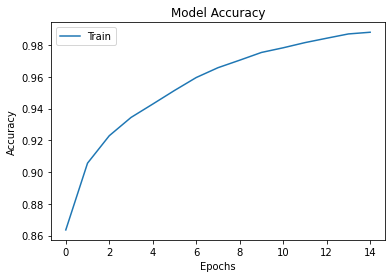

In [8]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))
print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [16]:
!pip install opencv-python
import cv2
import numpy as np
# Load and preprocess custom data
custom_image_path = "C:\\Users\\madhu\\OneDrive\\Desktop\\handbag.jpg"
custom_image = cv2.imread(custom_image_path, cv2.IMREAD_GRAYSCALE)
custom_image = cv2.resize(custom_image, (28, 28))
custom_image = custom_image.reshape((1, 28, 28, 1)) / 255.0
# Make predictions
predictions = model.predict(custom_image)
predicted_class = np.argmax(predictions)
# Display the predicted class
print("Predicted Class:", class_names[predicted_class])


1/1 [==============================] - 0s 170ms/step
Predicted Class: Pullover
